Epoch [100/1000], Loss: 0.004675
Epoch [200/1000], Loss: 0.002584
Epoch [300/1000], Loss: 0.002433
Epoch [400/1000], Loss: 0.002209
Epoch [500/1000], Loss: 0.000012
Epoch [600/1000], Loss: 0.000011
Epoch [700/1000], Loss: 0.000011
Epoch [800/1000], Loss: 0.000011
Epoch [900/1000], Loss: 0.000011
Epoch [1000/1000], Loss: 0.000011


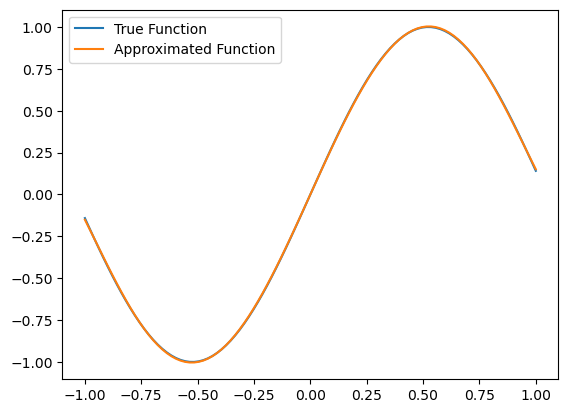

Total trainable parameters: 111


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Generate training data
x_train = torch.linspace(-1, 1, 100).view(-1, 1).to(device)
y_train = torch.sin(3*x_train).to(device)  

# Define the neural network model
class CubicApproximator(nn.Module):
    def __init__(self):
        super(CubicApproximator, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x
    
class PolyCubicApproximator(nn.Module):
    def __init__(self):
        super(PolyCubicApproximator, self).__init__()
        self.U1 = nn.Linear(1, 10)
        self.U2 = nn.Linear(1, 10)
        self.U3 = nn.Linear(1, 10)        
        self.c = nn.Linear(10, 1)
        self.U4 = nn.Linear(1, 10) 
        self.U5 = nn.Linear(1, 10) 
        #self.relu = nn.ReLU()

    def forward(self, z):
        x1 = self.U1(z)
        x2 = x1*self.U2(z) + x1
        x3 = x2*self.U3(z) + x2
        x4 = x3*self.U4(z) + x3
        x5 = x4*self.U5(z) + x4
        x = self.c(x5)
        return x

#model = CubicApproximator()
model = PolyCubicApproximator().to(device)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.train()
model.to(device)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(x_train)

# Plot the results

plt.plot(x_train.cpu().numpy(), y_train.cpu().numpy(), label='True Function')
plt.plot(x_train.cpu().numpy(), y_pred.cpu().numpy(), label='Approximated Function')
plt.legend()
plt.show()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
param_count = count_parameters(model)
print(f'Total trainable parameters: {param_count}')


Epoch [100/1000], Loss: 0.001793
Epoch [200/1000], Loss: 0.000442
Epoch [300/1000], Loss: 0.000196
Epoch [400/1000], Loss: 0.000091
Epoch [500/1000], Loss: 0.000130
Epoch [600/1000], Loss: 0.000073
Epoch [700/1000], Loss: 0.000091
Epoch [800/1000], Loss: 0.000065
Epoch [900/1000], Loss: 0.000068
Epoch [1000/1000], Loss: 0.002157


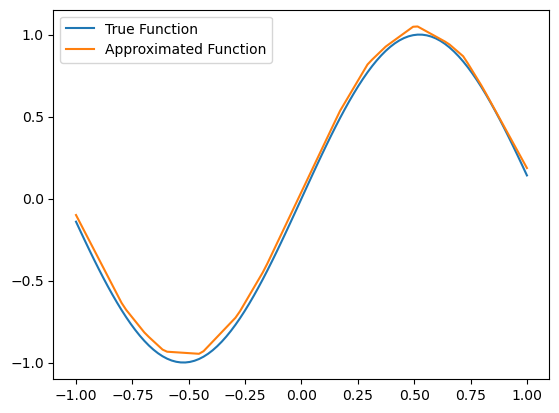

Total trainable parameters: 251


In [24]:
model = CubicApproximator().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.train()
model.to(device)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(x_train)

# Plot the results
plt.plot(x_train.cpu().numpy(), y_train.cpu().numpy(), label='True Function')
plt.plot(x_train.cpu().numpy(), y_pred.cpu().numpy(), label='Approximated Function')
plt.legend()
plt.show()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
param_count = count_parameters(model)
print(f'Total trainable parameters: {param_count}')
